In [10]:
import pandas as pd

In [11]:
df = pd.read_excel("../data/results.xlsx")


In [12]:
print(df.shape)
print(df.head())  # Melihat beberapa baris pertama
print(df.info())  # Memeriksa tipe data dan nilai null


(1143, 4)
      date  cases  deaths  recovered
0  1/22/20    557      17         30
1  1/23/20    657      18         32
2  1/24/20    944      26         39
3  1/25/20   1437      42         42
4  1/26/20   2120      56         56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1143 non-null   object
 1   cases      1143 non-null   int64 
 2   deaths     1143 non-null   int64 
 3   recovered  1143 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 35.8+ KB
None


In [14]:
print(df.isnull().sum())  # Melihat jumlah nilai kosong per kolom
# Menghapus baris atau kolom dengan nilai kosong
# df.dropna(inplace=True)  # Menghapus baris
# df.dropna(axis=1, inplace=True)  # Menghapus kolom
df.drop_duplicates(inplace=True)



date         0
cases        0
deaths       0
recovered    0
dtype: int64


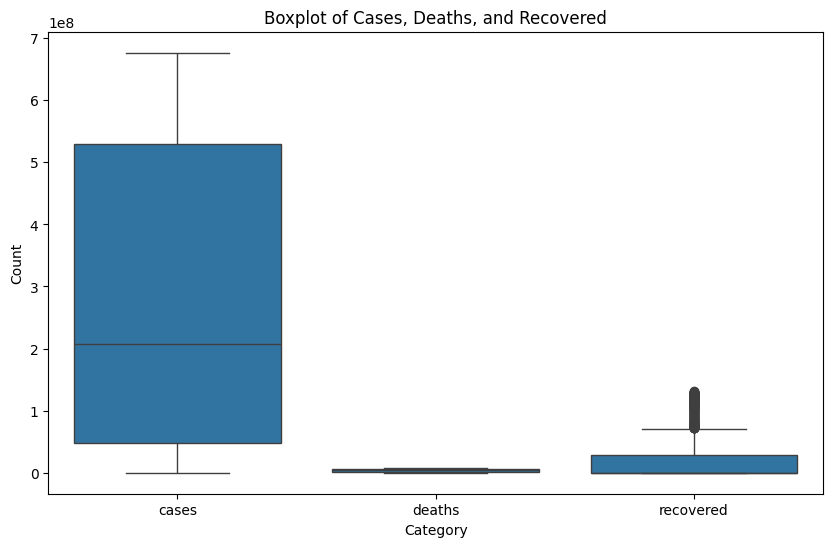

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Membuat DataFrame yang lebih panjang untuk seaborn
melted_df = df[['cases', 'deaths', 'recovered']].melt(var_name='Category', value_name='Count')

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Count', data=melted_df)
plt.title('Boxplot of Cases, Deaths, and Recovered')
plt.show()


In [25]:
# Menghitung IQR untuk setiap kolom
Q1 = df[['cases', 'deaths', 'recovered']].quantile(0.25)
Q3 = df[['cases', 'deaths', 'recovered']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = {}
for column in ['cases', 'deaths', 'recovered']:
    outliers[column] = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]

# Menampilkan outlier
for column, outlier_data in outliers.items():
    print(f'Outliers in {column}:')
    print(outlier_data)


Outliers in cases:
Empty DataFrame
Columns: [date, cases, deaths, recovered]
Index: []
Outliers in deaths:
Empty DataFrame
Columns: [date, cases, deaths, recovered]
Index: []
Outliers in recovered:
        date      cases   deaths  recovered
429  3/26/21  126578225  2883671   71463065
430  3/27/21  127162758  2893881   71768318
431  3/28/21  127655412  2901166   72097106
432  3/29/21  128114688  2909829   72401542
433  3/30/21  128676894  2921730   72736785
..       ...        ...      ...        ...
556  7/31/21  198389684  4246601  129705211
557   8/1/21  198872752  4254020  129994389
558   8/2/21  199443855  4262171  130277533
559   8/3/21  200078130  4272524  130582001
560   8/4/21  200758588  4283016  130899061

[132 rows x 4 columns]


In [26]:
# Statistik deskriptif
statistics = df[['cases', 'deaths', 'recovered']].describe()
print(statistics)


              cases        deaths     recovered
count  1.143000e+03  1.143000e+03  1.143000e+03
mean   2.772619e+08  3.866856e+06  2.055245e+07
std    2.397757e+08  2.436775e+06  3.548040e+07
min    5.570000e+02  1.700000e+01 -1.000000e+00
25%    4.742606e+07  1.282415e+06  0.000000e+00
50%    2.078154e+08  4.388700e+06  0.000000e+00
75%    5.288307e+08  6.312702e+06  2.849146e+07
max    6.765701e+08  6.881802e+06  1.308991e+08


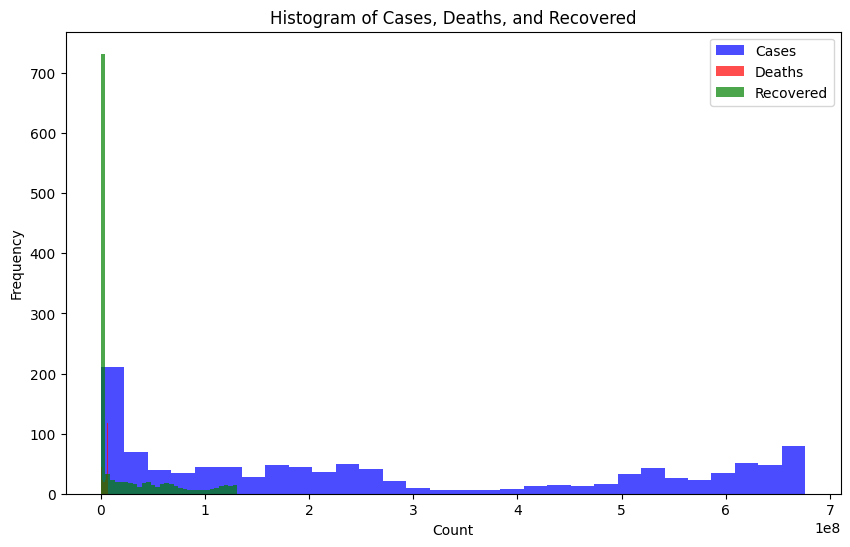

In [27]:
# Histogram untuk melihat distribusi
plt.figure(figsize=(10, 6))
plt.hist(df['cases'].dropna(), bins=30, alpha=0.7, label='Cases', color='blue')
plt.hist(df['deaths'].dropna(), bins=30, alpha=0.7, label='Deaths', color='red')
plt.hist(df['recovered'].dropna(), bins=30, alpha=0.7, label='Recovered', color='green')
plt.legend()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Cases, Deaths, and Recovered')
plt.show()


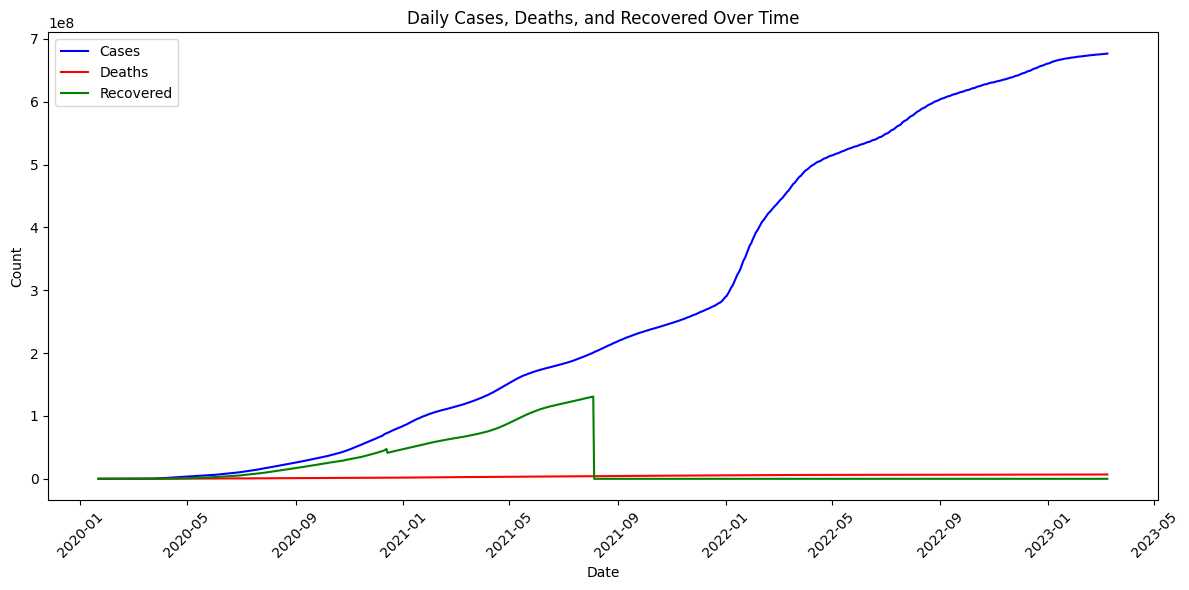

In [30]:

# Mengonversi kolom 'date' menjadi tipe datetime dengan format yang ditentukan
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


# Mengelompokkan berdasarkan tanggal dan menjumlahkan
daily_data = df.groupby('date')[['cases', 'deaths', 'recovered']].sum()

# Membuat plot tren waktu
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['cases'], label='Cases', color='blue')
plt.plot(daily_data.index, daily_data['deaths'], label='Deaths', color='red')
plt.plot(daily_data.index, daily_data['recovered'], label='Recovered', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Cases, Deaths, and Recovered Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
